In [ ]:
#Introduction

# This is a small project looking at the World Happiness Report, a landmark survey on the state of global happiness.
# The three main aims is too look at which countries and global regions contain the highest amount of happiness. Next one will
# look at what factors lead to higher happiness ranking sources. These factors will then be filter again to see which factors
# should receive the most attention from a country who wish to improve their happiness ranking.



#Source link      https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

In [4]:
#List of libarrys used to analysis and visualution the date set

import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

from IPython.display import HTML

df = pd.read_csv(r'C:\Users\paul_\Documents\data sets\world-happiness-report-2021.csv')

In [5]:
# data exploration phase: names of columns and index numbers used to exploration 
# and too making writing code quickly and accurately. 


col_names= df.columns

df_index = df.index


print(col_names)
print(df_index)

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')
RangeIndex(start=0, stop=149, step=1)


In [10]:
# first set of quarries used to answers our first research question.


country_happiness_head =df.loc[0:4,['Country name','Ladder score']]


country_happiness_full = df.loc[:,['Country name','Ladder score']]



HTML(country_happiness_head.to_html(classes = 'table table-striped'))


,Country name,Ladder score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464


In [11]:
# Mapping Countries who have the Highest happiness ranking sources.


country_top10 = df.loc[0:9,['Country name','Ladder score']]


HTML(country_top10.to_html(classes = 'table table-striped'))

,Country name,Ladder score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
5,Norway,7.392
6,Sweden,7.363
7,Luxembourg,7.324
8,New Zealand,7.277
9,Austria,7.268


In [15]:
# Mapping Countries who have the lowest happiness ranking sources.

country_bottom10 = df.loc[138:148, ['Country name','Ladder score']]
Sort_country_bottom10= country_bottom10.sort_values(by= ['Ladder score'], ascending=True)


HTML(Sort_country_bottom10.to_html(classes = 'table table-striped'))

,Country name,Ladder score
148,Afghanistan,2.523
147,Zimbabwe,3.145
146,Rwanda,3.415
145,Botswana,3.467
144,Lesotho,3.512
143,Malawi,3.600
142,Haiti,3.615
141,Tanzania,3.623
140,Yemen,3.658
139,Burundi,3.775


Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


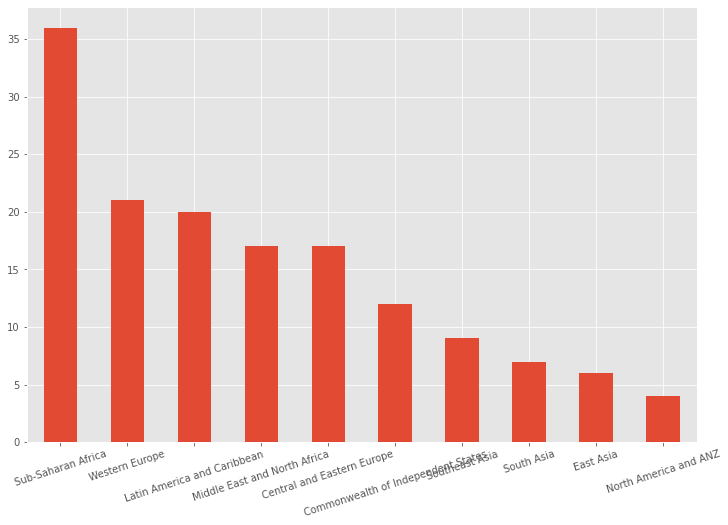

In [20]:
# Second set of  quarries used to answers our second research question. 
# Looking at region happiness instead of by country


regional_frenqunce = df['Regional indicator'].value_counts()

bar_regional_frenqunce = regional_frenqunce.plot.bar(x='Regional indicator', y='Ladder score', rot=18)
                                                
print(regional_frenqunce)     
print(bar_regional_frenqunce)

In [17]:
# Looking at average region happiness source to determine the happiest regions in the world.



top_regional_frenqunce = df[['Ladder score', 'Regional indicator']].groupby(['Regional indicator']).mean().sort_values('Ladder score', ascending=False)


HTML(top_regional_frenqunce.to_html(classes = 'table table-striped'))

,Ladder score
Regional indicator,
North America and ANZ,7.128500
Western Europe,6.914905
Central and Eastern Europe,5.984765
Latin America and Caribbean,5.908050
East Asia,5.810333
Commonwealth of Independent States,5.467000
Southeast Asia,5.407556
Middle East and North Africa,5.219765
Sub-Saharan Africa,4.494472


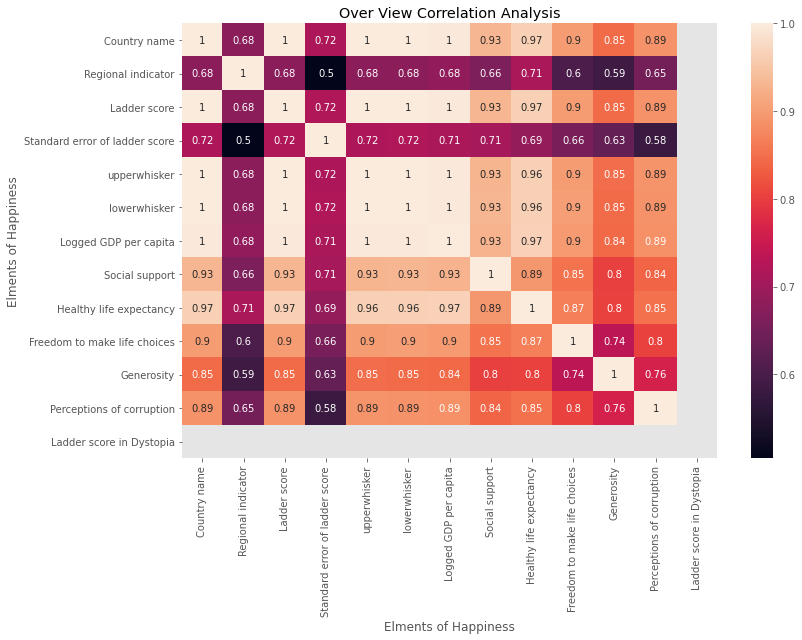

In [30]:
# Third set of queries looking at what factors led to a high gobble happiness ranking source.


over_corrlation_analsys = df.loc[:, ['Country name', 'Regional indicator', 'Ladder score','Standard error of ladder score', 'upperwhisker',
                                     'lowerwhisker','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 
                                     'Generosity','Perceptions of corruption', 'Ladder score in Dystopia']]


over_correlation_matrix = over_corrlation_analsys.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(over_correlation_matrix, annot = True)

plt.title("Over View Correlation Analysis")

plt.xlabel("Elments of Happiness")

plt.ylabel("Elments of Happiness")

plt.show()

In [ ]:
# when looking at the above heat map. In the top left correlation we see a lot of un useful correlation numbers related 
# to world happiness. To determine what leads to a country to have a higher happiness ranking. The bottom right correlation 
# on the contrary shows us that in columns: Logged GDP per capita, Social support, Healthy life expectancy, Freedom to 
# make life choices, Generosity. which all contain high correlation numbers. Therefore, in the next set of queries we be
# looking at this section more closely.


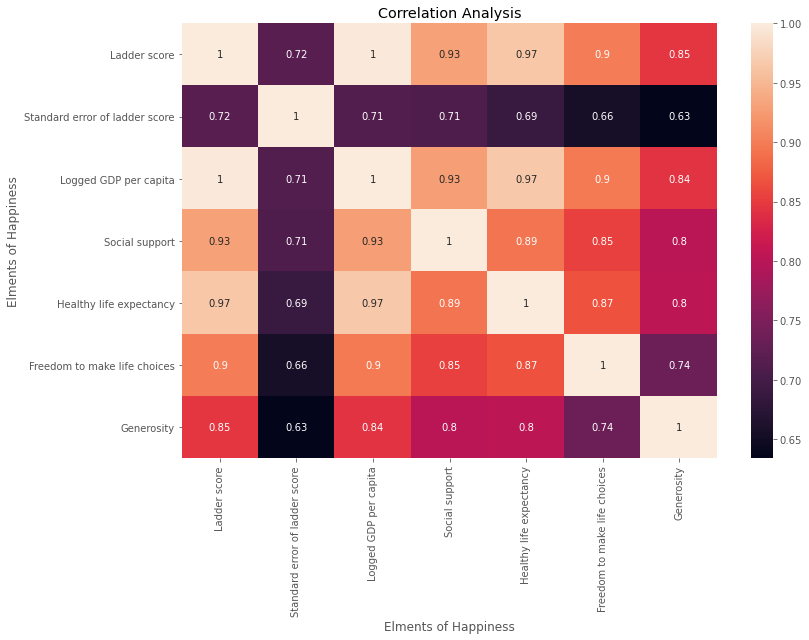

In [31]:
# fourth set of queries to further investigate correlation between the above factors and their effect on happiness ranking source. 




corrlation_analsys = df.loc[:, ['Ladder score','Standard error of ladder score','Logged GDP per capita', 
                                'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity']]



refinded_correlation_matrix = corrlation_analsys.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(refinded_correlation_matrix, annot = True)

plt.title("Correlation Analysis")

plt.xlabel("Elments of Happiness")

plt.ylabel("Elments of Happiness")

plt.show()

In [47]:
# Extraction of the above table’s results.

corrlation_result = corrlation_analsys.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = corrlation_result.unstack()

top_corr_paris = corr_pairs[0:7]
top_corr_paris_st_error = corr_pairs[7:14]

sorted_corr = top_corr_paris.sort_values(ascending=False)
sorted_top_corr_paris_st_error = top_corr_paris_st_error.sort_values(ascending=False)
print(sorted_corr)
print(sorted_top_corr_paris_st_error)

Ladder score  Ladder score                      1.000000
              Logged GDP per capita             0.997788
              Healthy life expectancy           0.965151
              Social support                    0.930737
              Freedom to make life choices      0.900484
              Generosity                        0.846129
              Standard error of ladder score    0.717409
dtype: float64
Standard error of ladder score  Standard error of ladder score    1.000000
                                Ladder score                      0.717409
                                Logged GDP per capita             0.712299
                                Social support                    0.708245
                                Healthy life expectancy           0.689166
                                Freedom to make life choices      0.655945
                                Generosity                        0.633858
dtype: float64


In [25]:
# visualization of the results of the correlation investigation of which factors have the most effect on happiness ranking source.


corr_source_data = {'happiness Elment': ['Ladder score ', 'Logged GDP per capita ', 'Healthy life expectancy', 'Social support ', 'Freedom to make life choices','Generosity','Standard error of ladder score'],
        'corrlation source': [1.000000, 0.997788, 0.965151, 0.930737, 0.900484, 0.846129, 0.717409],
                    'Standard error of ladder score':[0.717409, 0.712299, 0.708245, 0.689166, 0.655945, 0.633858, 1.000000],
        }

corr_source_data_df = pd.DataFrame(corr_source_data)

HTML(corr_source_data_df.to_html(classes = 'table table-striped'))


,happiness Elment,corrlation source,Standard error of ladder score
0,Ladder score,1.000000,0.717409
1,Logged GDP per capita,0.997788,0.712299
2,Healthy life expectancy,0.965151,0.708245
3,Social support,0.930737,0.689166
4,Freedom to make life choices,0.900484,0.655945
5,Generosity,0.846129,0.633858
6,Standard error of ladder score,0.717409,1.000000


In [ ]:
# conclusion


# To conclude our investigation we can see that Finland is the happiest country in the word and Afghanistan is the least 
# happiest country in the world. When looking the happiest regions in the world. North America and ANZ have the highest 
# source and Sub-Saharan African has the lowest ranking. When looking at our second research question.  We find that factors: 
# Logged GDP per capita Social support, Healthy life expectancy , Freedom to make life choices and Generosity have the biggest
# affect of world happiness ranking sources. Thus, if country with low scores should aim to work on improving these aspects 
# in order to bring up the happiness sources in their country. 
 


